- How much disk space does each trained model take?
- How large are the AIBOM files?
- Does model size increase with training time/epochs?
- What is the storage overhead of generating an AIBOM

,Epochs,Dataset Size (KB),Definition Size (KB),Model Size (KB),AIBOM Size (KB),Logs Size (KB),Metrics Size (KB),RunLink Size (KB),AIBOM % of Model
0,1,0.0,0.0,3730.624023,13.507812,4.251953,0.129883,1.273438,0.362079
1,3,0.0,0.0,3730.624023,13.664062,4.251953,0.286133,1.273438,0.366267
2,5,0.0,0.0,3730.624023,13.822266,4.251953,0.444336,1.273438,0.370508
3,10,0.0,0.0,3730.624023,14.197266,4.251953,0.818359,1.273438,0.380560
4,20,0.0,0.0,3730.624023,14.969727,4.251953,1.591797,1.273438,0.401266
5,50,0.0,0.0,3730.624023,17.330078,4.251953,3.955078,1.273438,0.464536


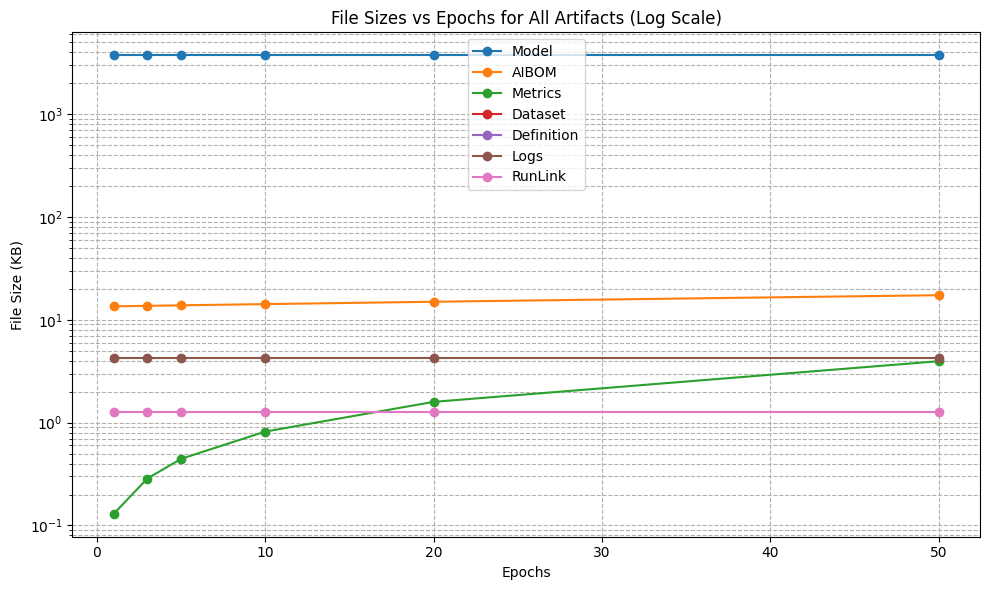

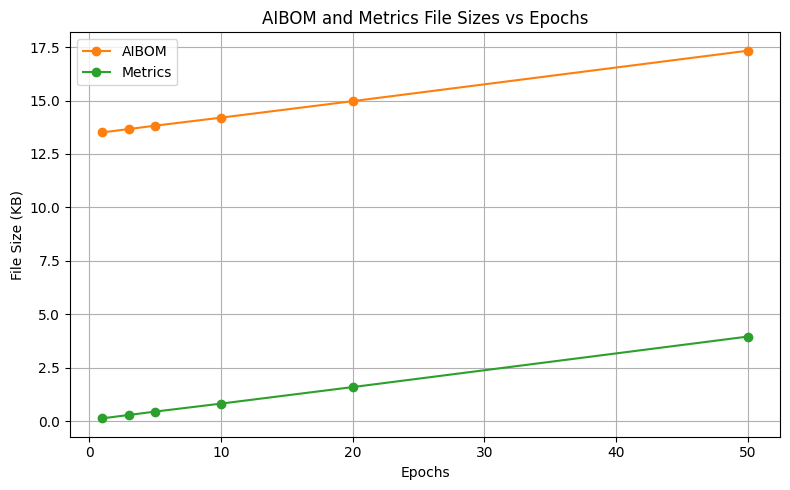

In [ ]:
# to make this script executable, after running performance.py, make sure you download the folders from minio (dashboard is easiest)
# and that they are in your download folder (~/Downloads/). Then update folder paths and run this.

import os
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

DOWNLOADS = Path.home() / "Downloads"
# Example: fill in your actual file paths for each run (in order!)
epochs_list = [1, 3, 5, 10, 20, 50]
minio_job_folders = [
    "00c383d1-b478-49d6-bc4e-c3458ba1122d",
    "37508286-5c53-4537-8212-8c21b9cbc768",
    "d67ee302-7315-4b7e-9747-f8abd1ec48a7",
    "e65b44b3-d83c-46dd-989e-cdfa823b1eb5",
    "df490a48-9cec-4fdd-8ff8-da420014c8d4",
    "5455cdb8-ccb4-4ec8-9a01-7a902dfcf5f4",
]
model_sizes = []
aibom_sizes = []
dataset_sizes = []
definition_sizes = []
logs_sizes = []
metrics_sizes = []
runlink_sizes = []

for folder in minio_job_folders:
    folder_path = DOWNLOADS / folder
    # Top-level files
    dataset_file = folder_path / "dataset"
    definition_file = folder_path / "definition"
    # Output files
    output_path = folder_path / "output"
    model_file = output_path / "trained_model.keras"
    aibom_file = output_path / "cyclonedx_bom.json"
    logs_file = output_path / "logs.log"
    metrics_file = output_path / "metrics.json"
    runlink_file = next(output_path.glob("run_training.*.link"), None)

    # Get sizes in KB (handle missing files gracefully)
    dataset_sizes.append(dataset_file.stat().st_size / 1024 if dataset_file.exists() else None)
    definition_sizes.append(definition_file.stat().st_size / 1024 if definition_file.exists() else None)
    model_sizes.append(model_file.stat().st_size / 1024 if model_file.exists() else None)
    aibom_sizes.append(aibom_file.stat().st_size / 1024 if aibom_file.exists() else None)
    logs_sizes.append(logs_file.stat().st_size / 1024 if logs_file.exists() else None)
    metrics_sizes.append(metrics_file.stat().st_size / 1024 if metrics_file.exists() else None)
    runlink_sizes.append(runlink_file.stat().st_size / 1024 if runlink_file and runlink_file.exists() else None)

df = pd.DataFrame({
    "Epochs": epochs_list,
    "Dataset Size (KB)": dataset_sizes,
    "Definition Size (KB)": definition_sizes,
    "Model Size (KB)": model_sizes,
    "AIBOM Size (KB)": aibom_sizes,
    "Logs Size (KB)": logs_sizes,
    "Metrics Size (KB)": metrics_sizes,
    "RunLink Size (KB)": runlink_sizes,
    "AIBOM % of Model": [100 * a / m if m else None for a, m in zip(aibom_sizes, model_sizes)]
})
display(df)

plt.figure(figsize=(10,6))
plt.plot(df["Epochs"], df["Model Size (KB)"], marker='o', label="Model")
plt.plot(df["Epochs"], df["AIBOM Size (KB)"], marker='o', label="AIBOM")
plt.plot(df["Epochs"], df["Metrics Size (KB)"], marker='o', label="Metrics")
plt.plot(df["Epochs"], df["Dataset Size (KB)"], marker='o', label="Dataset")
plt.plot(df["Epochs"], df["Definition Size (KB)"], marker='o', label="Definition")
plt.plot(df["Epochs"], df["Logs Size (KB)"], marker='o', label="Logs")
plt.plot(df["Epochs"], df["RunLink Size (KB)"], marker='o', label="RunLink")

plt.xlabel("Epochs")
plt.ylabel("File Size (KB)")
plt.title("File Sizes vs Epochs for All Artifacts (Log Scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# Use the same colors as in the previous plot for AIBOM and Metrics
plt.figure(figsize=(8,5))
plt.plot(df["Epochs"], df["AIBOM Size (KB)"], marker='o', label="AIBOM", color="#ff7f0e")   # orange
plt.plot(df["Epochs"], df["Metrics Size (KB)"], marker='o', label="Metrics", color="#2ca02c") # green
plt.xlabel("Epochs")
plt.ylabel("File Size (KB)")
plt.title("AIBOM and Metrics File Sizes vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

